**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from scipy import stats
from sklearn.metrics.pairwise import pairwise_distances
%load_ext pycodestyle_magic


In [14]:
%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        X = X.astype(float)
        self.train_x = np.array(X).astype(float)
        self.train_y = np.array(y)

        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.train_x, leaf_size=60)

        self.type_quantity = len(np.unique(self.train_y))

    def mink_dist(self, X):
        X = X.astype(float)
        dist = pairwise_distances(X=X, Y=self.train_x)

        return dist

    def predict(self, X):
        X = X.astype(float)
        if self.algorithm == 'brute':
            distances = self.mink_dist(X)
            predict = self.train_y[np.argpartition(distances,
                                   self.n_neighbors)[:, :self.n_neighbors]]

        if self.algorithm == 'kd_tree':
            distances, indexes = self.tree.query(X, k=self.n_neighbors)
            predict = self.train_y[indexes]

        return stats.mode(predict.T)[0].reshape(-1)

    def predict_proba(self, X):
        X = X.astype(float)
        if self.algorithm == 'brute':
            distances = self.mink_dist(X)
            indexes = np.argpartition(distances,
                                      self.n_neighbors)[:, :self.n_neighbors]
        if self.algorithm == 'kd_tree':
            distances, indexes = self.tree.query(X, k=self.n_neighbors)
        types_quantity = np.zeros((X.shape[0], self.type_quantity))
        for i in range(indexes.shape[0]):
            for j in indexes[i]:
                types_quantity[i][int(self.train_y[j])] += 1

        return types_quantity / self.n_neighbors

    def score(self, X, y):
        return float((self.predict(X) == y).sum() / y.shape[0])

57:1: W391 blank line at end of file


**IRIS**

In [15]:
iris = datasets.load_iris()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [20]:
%time clf.predict(X_test)

Wall time: 997 µs


array([1, 1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2])

In [21]:
%time my_clf.predict(X_test)

Wall time: 367 ms


array([1, 1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2])

In [22]:
%time clf.predict_proba(X_test)

Wall time: 1.99 ms


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [23]:
%time my_clf.predict_proba(X_test)

Wall time: 997 µs


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [24]:
clf.score(X_test, y_test)

0.8666666666666667

In [25]:
my_clf.score(X_test, y_test)

0.8666666666666667

Задание 3

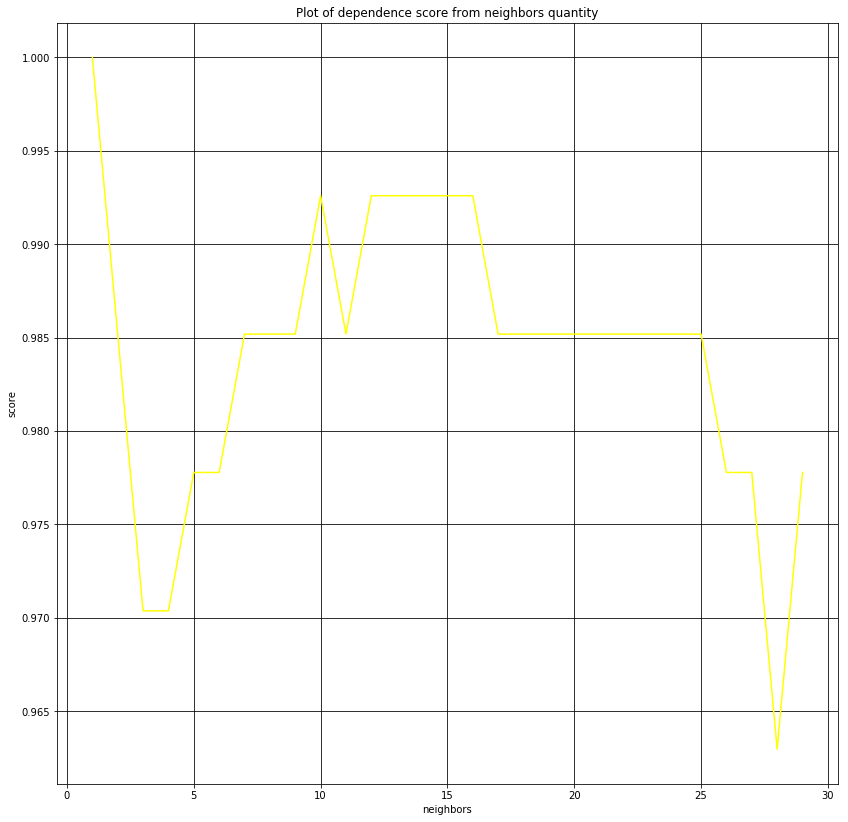

Best score is 0.9925925925925926 by the quantity of neighbors: [ 9 11 12 13 14 15]


In [26]:
N = 30
test_accuracy = np.zeros(N-1)
sklearn_test_accuracy = np.zeros(N-1)
for i in range(1, N):
    my_knn = MyKNeighborsClassifier(n_neighbors=i)
    my_knn.fit(X_train, y_train)
    test_accuracy[i-1] = my_knn.score(X_train, y_train)

best_res = np.sort(test_accuracy)[N-3]
best_res_ind = np.where(test_accuracy == best_res)

plt.figure(figsize=(14,14))
plt.subplot(1, 1, 1)
plt.grid(color="black")
plt.title("Plot of dependence score from neighbors quantity")
plt.plot(range(1,N), test_accuracy, color="yellow")
plt.xlabel('neighbors')
plt.ylabel('score')
plt.show()
#print(best_res[best_res_ind])
print('Best score is',best_res, 'by the quantity of neighbors:', *best_res_ind)



**MNIST**

In [27]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')


In [28]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [29]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [30]:
%time clf.fit(X_train, y_train)

Wall time: 1min 6s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [31]:
%time my_clf.fit(X_train, y_train)

Wall time: 916 ms


In [32]:
%time clf.predict(X_test)

Wall time: 1min 44s


array(['4', '3', '4', '6', '8', '3', '1', '1', '7', '4', '5', '7', '1',
       '7', '0', '5', '6', '8', '6', '0', '4', '7', '7', '3', '5', '1',
       '1', '8', '3', '0', '5', '4', '0', '8', '5', '7', '6', '1', '5',
       '3', '0', '7', '3', '7', '9', '5', '9', '7', '8', '7', '9', '2',
       '1', '9', '9', '7', '7', '6', '6', '2', '4', '1', '3', '1', '1',
       '4', '2', '6', '1', '6', '9', '7', '0', '9', '1', '7', '6', '7',
       '0', '3', '6', '3', '6', '2', '1', '1', '2', '4', '7', '0', '2',
       '7', '0', '7', '3', '7', '6', '7', '1', '1', '1', '5', '8', '1',
       '4', '2', '1', '1', '3', '1', '3', '7', '8', '3', '7', '0', '2',
       '4', '4', '3', '5', '3', '5', '2', '2', '3', '2', '5', '0', '9',
       '2', '9', '5', '7', '8', '2', '9', '8', '3', '3', '8', '4', '0',
       '8', '5', '4', '4', '2', '3', '6', '3', '8', '3', '3', '6', '4',
       '8', '4', '1', '1', '7', '5', '0', '9', '7', '8', '3', '0', '2',
       '1', '3', '7', '3', '7', '0', '0', '0', '0', '2', '2', '6

In [33]:
%time my_clf.predict(X_test)

Wall time: 7.97 s


D:\Anacondas\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


array(['4', '3', '4', '6', '8', '3', '1', '1', '7', '4', '5', '7', '1',
       '7', '0', '5', '6', '8', '6', '0', '4', '7', '7', '3', '5', '1',
       '1', '8', '3', '0', '5', '4', '0', '8', '5', '7', '6', '1', '5',
       '3', '0', '7', '3', '7', '9', '5', '9', '7', '8', '7', '9', '2',
       '1', '9', '9', '7', '7', '6', '6', '2', '4', '1', '3', '1', '1',
       '4', '2', '6', '1', '6', '9', '7', '0', '9', '1', '7', '6', '7',
       '0', '3', '6', '3', '6', '2', '1', '1', '2', '4', '7', '0', '2',
       '7', '0', '7', '3', '7', '6', '7', '1', '1', '1', '5', '8', '1',
       '4', '2', '1', '1', '3', '1', '3', '7', '8', '3', '7', '0', '2',
       '4', '4', '3', '5', '3', '5', '2', '2', '3', '2', '5', '0', '9',
       '2', '9', '5', '7', '8', '2', '9', '8', '3', '3', '8', '4', '0',
       '8', '5', '4', '4', '2', '3', '6', '3', '8', '3', '3', '6', '4',
       '8', '4', '1', '1', '7', '5', '0', '9', '7', '8', '3', '0', '2',
       '1', '3', '7', '3', '7', '0', '0', '0', '0', '2', '2', '6

In [34]:
%time clf.predict_proba(X_test)

Wall time: 1min 37s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
%time my_clf.predict_proba(X_test)

Wall time: 3.71 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
clf.score(X_test, y_test)

0.9757142857142858

In [37]:
my_clf.score(X_test, y_test)


D:\Anacondas\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.9757142857142858

Задание 4

In [38]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [41]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)


In [42]:
%time clf.fit(X_train, y_train)

Wall time: 1min 3s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [43]:
%time my_clf.fit(X_train, y_train)

Wall time: 1min 7s


In [44]:
%time clf.predict(X_test)

Wall time: 1min 43s


array(['8', '6', '2', '9', '9', '4', '9', '0', '4', '3', '2', '0', '2',
       '2', '1', '3', '5', '1', '3', '5', '7', '6', '1', '3', '8', '0',
       '3', '8', '5', '1', '6', '2', '9', '3', '3', '2', '1', '1', '3',
       '2', '2', '9', '2', '7', '2', '6', '6', '3', '2', '6', '5', '0',
       '5', '3', '8', '9', '4', '5', '8', '1', '4', '1', '5', '1', '1',
       '6', '8', '9', '7', '8', '6', '8', '4', '7', '9', '6', '3', '6',
       '0', '7', '7', '5', '1', '1', '5', '6', '8', '2', '4', '1', '7',
       '0', '4', '1', '3', '3', '8', '6', '5', '1', '4', '7', '0', '4',
       '3', '3', '7', '4', '6', '2', '5', '7', '2', '4', '5', '2', '5',
       '6', '9', '7', '3', '2', '8', '1', '3', '0', '2', '9', '7', '8',
       '9', '2', '8', '7', '9', '8', '0', '4', '3', '5', '1', '8', '6',
       '6', '5', '0', '4', '5', '4', '9', '7', '4', '0', '9', '3', '1',
       '2', '6', '0', '3', '1', '0', '9', '4', '6', '8', '9', '2', '3',
       '2', '1', '5', '8', '2', '2', '1', '4', '8', '8', '0', '0

In [45]:
%time my_clf.predict(X_test)

Wall time: 1min 22s


D:\Anacondas\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


array(['8', '6', '2', '9', '9', '4', '9', '0', '4', '3', '2', '0', '2',
       '2', '1', '3', '5', '1', '3', '5', '7', '6', '1', '3', '8', '0',
       '3', '8', '5', '1', '6', '2', '9', '3', '3', '2', '1', '1', '3',
       '2', '2', '9', '2', '7', '2', '6', '6', '3', '2', '6', '5', '0',
       '5', '3', '8', '9', '4', '5', '8', '1', '4', '1', '5', '1', '1',
       '6', '8', '9', '7', '8', '6', '8', '4', '7', '9', '6', '3', '6',
       '0', '7', '7', '5', '1', '1', '5', '6', '8', '2', '4', '1', '7',
       '0', '4', '1', '3', '3', '8', '6', '5', '1', '4', '7', '0', '4',
       '3', '3', '7', '4', '6', '2', '5', '7', '2', '4', '5', '2', '5',
       '6', '9', '7', '3', '2', '8', '1', '3', '0', '2', '9', '7', '8',
       '9', '2', '8', '7', '9', '8', '0', '4', '3', '5', '1', '8', '6',
       '6', '5', '0', '4', '5', '4', '9', '7', '4', '0', '9', '3', '1',
       '2', '6', '0', '3', '1', '0', '9', '4', '6', '8', '9', '2', '3',
       '2', '1', '5', '8', '2', '2', '1', '4', '8', '8', '0', '0

In [46]:
%time clf.predict_proba(X_test)

Wall time: 1min 44s


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 20s


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
clf.score(X_test, y_test)

0.9728571428571429

In [49]:
my_clf.score(X_test, y_test)

D:\Anacondas\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.9728571428571429

Задание 5

In [50]:
# seaborn
# matplotlib
# train_test_split
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# ClassifierMixin
# NeighborsBase
# KNeighborsMixin
# SupervisedIntegerMixin

In [51]:
# seaborn - библиотека для визуализации данных на основе matplotlib

In [52]:
# matplotlib - библиотека с методами построения различных графиков, гистограмм и аналогичных

In [53]:
# train_test_split - функция, делящая выборку на обучающую и тестовую

In [54]:
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - функция, позволяющая последовательно преобразовывать данные

In [55]:
# StandardScaler (from sklearn.preprocessing import StandardScaler) - класс для вычисления мат. ожидания и дисперсии

In [56]:
# ClassifierMixin - класс, от которого наследуются все классификаторы из sclearn

In [57]:
# NeighborsBase - класс KNN

In [58]:
# KNeighborsMixin - класс поиска ближайших соседей

In [59]:
# SupervisedIntegerMixin- класс метода fit